### Importing packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data
df = pd.read_csv('data.csv', parse_dates=['date'])

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

### checking for missing data:

In [5]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

> Data needs to be cleaned. There is missing data need to be cleaned.

####  Filling missing data of numeric columns using Imputer

In [6]:
df.shape

(12043, 23)

In [7]:
from sklearn.impute import SimpleImputer
numeric_cols = ['card_present_flag','merchant_code', 'balance', 'age', 'amount']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imputer.fit_transform(df[numeric_cols])
x = pd.DataFrame(x, columns=numeric_cols)
df.drop(numeric_cols, axis=1, inplace=True)


In [8]:
df=df.join(x)
df.shape

(12043, 23)

In [9]:
df.isna().sum()

status                   0
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
first_name               0
date                     0
gender                   0
merchant_suburb       4326
merchant_state        4326
extraction               0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
card_present_flag        0
merchant_code            0
balance                  0
age                      0
amount                   0
dtype: int64

#### Filling missing data for string columns

In [10]:
df.columns

Index(['status', 'bpay_biller_code', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'date', 'gender',
       'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id',
       'country', 'customer_id', 'merchant_long_lat', 'movement',
       'card_present_flag', 'merchant_code', 'balance', 'age', 'amount'],
      dtype='object')

In [11]:
dates = df['date']

In [12]:
string_cols = ['status', 'bpay_biller_code', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'gender',
       'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id',
       'country', 'customer_id', 'merchant_long_lat', 'movement']
numeric_cols = ['card_present_flag','merchant_code', 'balance', 'age', 'amount']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df1 = imputer.fit_transform(df[string_cols])
df2 = df[numeric_cols]
df1 = pd.DataFrame(df1, columns=string_cols)
df=df2.join(df1)
df['date'] = dates
df.isna().sum()

card_present_flag    0
merchant_code        0
balance              0
age                  0
amount               0
status               0
bpay_biller_code     0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
gender               0
merchant_suburb      0
merchant_state       0
extraction           0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
date                 0
dtype: int64

> Data is cleaned such that there is no missing data

In [13]:
df.shape

(12043, 23)

In [14]:
## adding new column names month for the month in which the transactions are done
df['month'] = df.date.dt.month

> what is the average transaction amount? 

In [15]:
average_transaction_amount = df['amount'].mean()
print('Average Tranaction amount: ',average_transaction_amount)

Average Tranaction amount:  187.93358797641784


> How many transactions do customers make each month, on average?

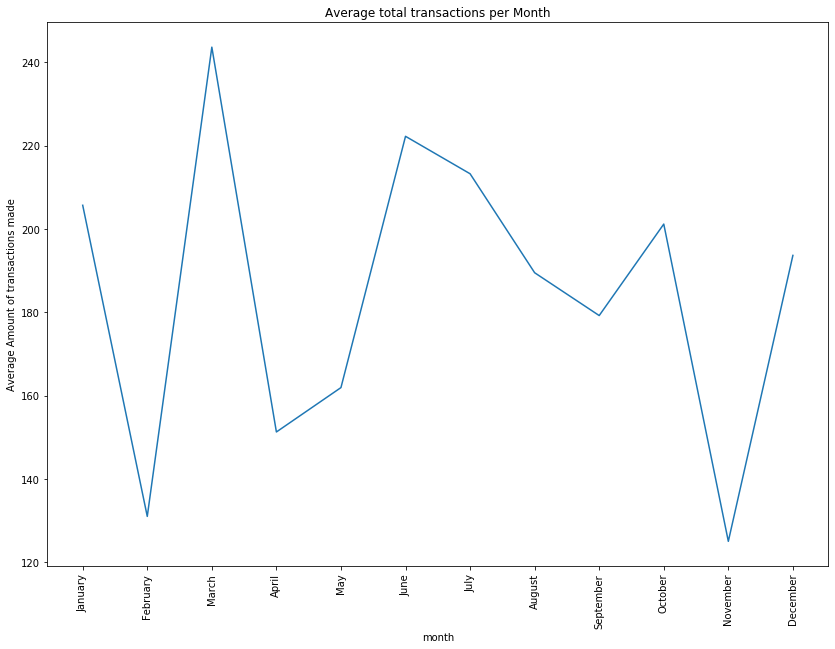

In [16]:
plt.figure(figsize=(14,10))
df.groupby(['month'])['amount'].mean().plot();
plt.xticks(list(range(1,13)), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=90)
plt.ylabel('Average Amount of transactions made');
plt.title('Average total transactions per Month');
plt.savefig('fig-1.png')

#### We can observe highest amount of transactions took place in `March`

> Visualise transaction volume and spending over the course of an average day or week.

### we need to process the data to accomplish the task

In [17]:
df['day']=df.date.dt.dayofweek

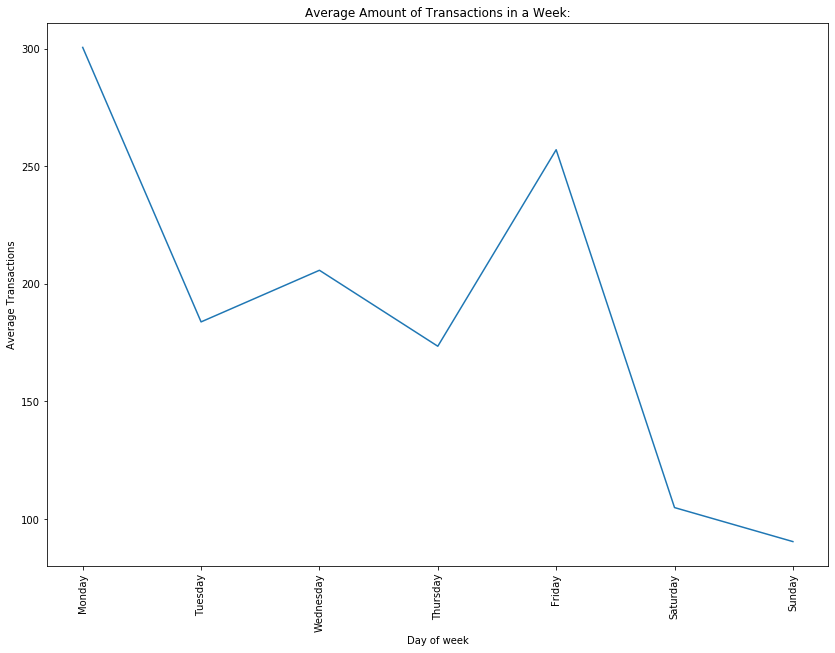

In [18]:
plt.figure(figsize=(14, 10))
ax = df.groupby('day')['amount'].mean().plot();
plt.xlabel('Day of week');
plt.ylabel('Average Transactions');
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90);
plt.title('Average Amount of Transactions in a Week:');
plt.savefig('fig-2.png')

**We can observe that Highest average transactions took place on Monday.**

>  what insights can we draw from the location information provided in the dataset?

In [19]:
df[['long_lat', 'merchant_long_lat']].head(10)

,long_lat,merchant_long_lat
0,153.41 -27.95,153.38 -27.99
1,153.41 -27.95,151.21 -33.87
2,151.23 -33.94,151.21 -33.87
3,153.10 -27.66,153.05 -26.68
4,153.41 -27.95,153.44 -28.06
5,151.22 -33.87,151.21 -33.87
6,144.95 -37.76,144.95 -37.53
7,144.95 -37.76,144.96 -37.81
8,116.06 -32.00,115.85 -31.9
9,151.23 -33.96,151.21 -33.87


 We will try visualising no of transactions taking place in different locations!
 - We'll find out the locations with highest and lowest transactions
 - First, we'll create another Dataframe that deals with the data regarding the no of transactions for each location

In [20]:
df_loc = pd.DataFrame(df.long_lat.value_counts().reset_index())
df_loc.columns = ['Location', 'No_of_transactions']

In [21]:
df_loc

,Location,No_of_transactions
0,153.41 -27.95,578
1,151.23 -33.94,303
2,116.06 -32.00,292
3,145.45 -37.74,260
4,153.10 -27.66,259
...,...,...
95,149.03 -35.25,40
96,149.19 -21.15,37
97,145.09 -37.82,34
98,130.98 -12.49,31


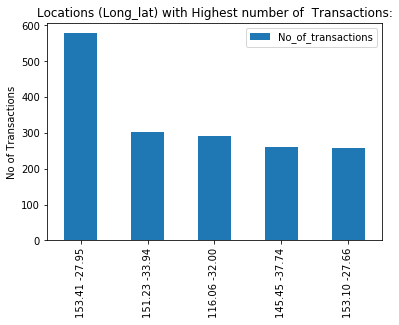

In [22]:

df_loc.head().plot(kind='bar');
plt.title('Locations (Long_lat) with Highest number of  Transactions:');
plt.xticks([0,1,2,3,4],list(df_loc.Location[:5]), rotation=90);
plt.ylabel('No of Transactions');
plt.savefig('fig-3.png')

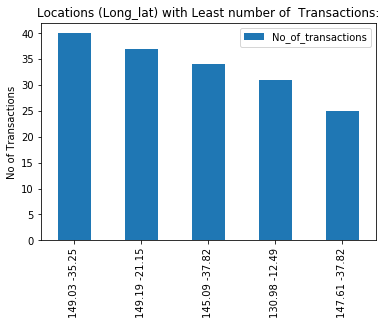

In [23]:

df_loc.tail().plot(kind='bar');
plt.xticks([0,1,2,3,4],list(df_loc.Location[95:]), rotation=90);
plt.ylabel('No of Transactions');
plt.title('Locations (Long_lat) with Least number of  Transactions:');
plt.savefig('fig-4.png')